<a href="https://colab.research.google.com/github/creamcheesesteak/test_deeplearning/blob/master/reuters_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, 

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [3]:
print(y_train[5], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [4]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [5]:
import numpy as np

In [6]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [7]:
len(np.unique(y_train))

46

# make model

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000, output_dim=42)) # input layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
model.add(tf.keras.layers.Flatten()) # hidden layer
model.add(tf.keras.layers.Dense(46, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) #gadget

In [10]:
hist = model.fit(pad_x_train, y_train, epochs=70, validation_split=0.3, batch_size=256)

Epoch 1/70
25/25 [==============================] - 22s 731ms/step - loss: 3.7540 - acc: 0.2036 - val_loss: 3.5625 - val_acc: 0.2215
Epoch 2/70
25/25 [==============================] - 17s 701ms/step - loss: 3.2854 - acc: 0.2150 - val_loss: 2.9867 - val_acc: 0.2215
Epoch 3/70
25/25 [==============================] - 17s 700ms/step - loss: 2.8296 - acc: 0.2150 - val_loss: 2.6523 - val_acc: 0.2215
Epoch 4/70
25/25 [==============================] - 18s 716ms/step - loss: 2.6012 - acc: 0.2150 - val_loss: 2.5063 - val_acc: 0.2215
Epoch 5/70
25/25 [==============================] - 18s 716ms/step - loss: 2.4754 - acc: 0.3851 - val_loss: 2.3766 - val_acc: 0.4968
Epoch 6/70
25/25 [==============================] - 18s 715ms/step - loss: 2.3630 - acc: 0.5109 - val_loss: 2.2967 - val_acc: 0.5210
Epoch 7/70
25/25 [==============================] - 18s 720ms/step - loss: 2.3054 - acc: 0.5217 - val_loss: 2.2568 - val_acc: 0.5280
Epoch 8/70
25/25 [==============================] - 18s 721ms/step - 

# evaluation

In [11]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [12]:
# 학습 시켰던 데이터
model.evaluate(pad_x_train, y_train)

281/281 [==============================] - 16s 56ms/step - loss: 1.1401 - acc: 0.7209


[1.1401193141937256, 0.72088623046875]

In [13]:
pad_x_train= tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
pad_x_test= tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [14]:
def pad_make(x_data):
  pad_x= tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [15]:
pad_make_x = pad_make(x_test)

In [16]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 4s 57ms/step - loss: 1.8943 - acc: 0.5784


[1.8942681550979614, 0.5783615112304688]

In [17]:
pad_make(x_test)

array([[   0,    0,    0, ...,  510,   17,   12],
       [6337,  268,  609, ...,  760,   17,   12],
       [   0,    0,    0, ...,    8,   17,   12],
       ...,
       [   0,    0,    0, ...,   11,   17,   12],
       [   0,    0,    0, ...,    8,   17,   12],
       [   0,    0,    0, ..., 1523,   17,   12]], dtype=int32)

In [18]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 4s 58ms/step - loss: 1.8943 - acc: 0.5784


[1.8942681550979614, 0.5783615112304688]

In [19]:
import matplotlib.pyplot as plt

In [ ]:
hist.history['loss']

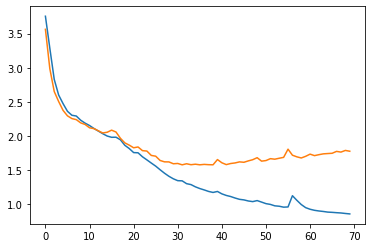

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

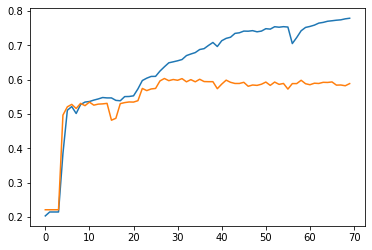

In [22]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

In [23]:
from sklearn.metrics import classification_report

In [24]:
y_train_pred = model.predict(pad_x_train)

In [25]:
import numpy as np

In [26]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [27]:
classification_report(y_train, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        55\n           1       0.75      0.78      0.76       432\n           2       0.00      0.00      0.00        74\n           3       0.92      0.96      0.94      3159\n           4       0.91      0.90      0.91      1949\n           5       0.00      0.00      0.00        17\n           6       0.00      0.00      0.00        48\n           7       0.00      0.00      0.00        16\n           8       0.00      0.00      0.00       139\n           9       0.00      0.00      0.00       101\n          10       0.17      0.75      0.28       124\n          11       0.57      0.74      0.65       390\n          12       0.00      0.00      0.00        49\n          13       0.59      0.34      0.43       172\n          14       0.00      0.00      0.00        26\n          15       0.00      0.00      0.00        20\n          16       0.65      0.65      0.65       444\n       

In [28]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.75      0.78      0.76       432
           2       0.00      0.00      0.00        74
           3       0.92      0.96      0.94      3159
           4       0.91      0.90      0.91      1949
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00       139
           9       0.00      0.00      0.00       101
          10       0.17      0.75      0.28       124
          11       0.57      0.74      0.65       390
          12       0.00      0.00      0.00        49
          13       0.59      0.34      0.43       172
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        20
          16       0.65      0.65      0.65       444
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
y_test_pred = model.predict(pad_x_test)

In [ ]:
y_pred = np.argmax(y_test_pred, axis=1)

In [ ]:
classification_report(y_test, y_pred)